In [1]:
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import pandas as pd

In [36]:
df = pd.read_csv("tuned_movies.csv")

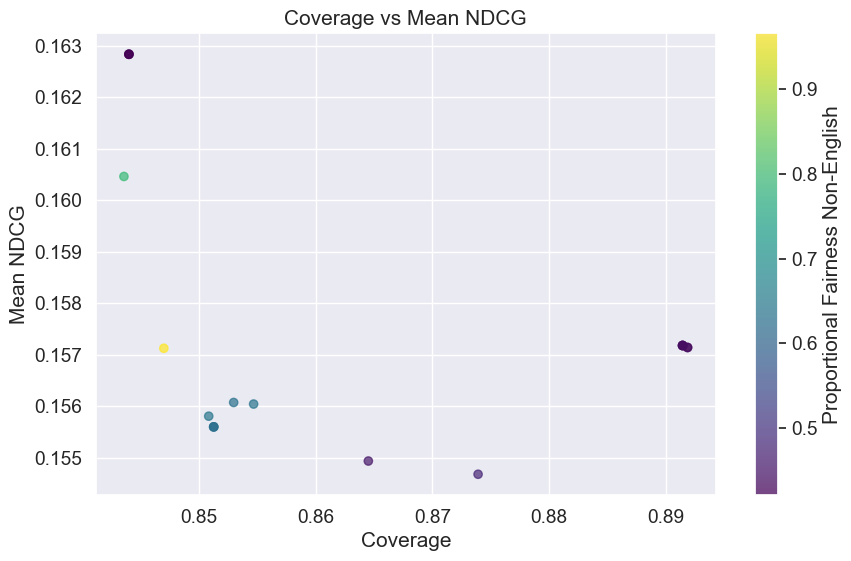

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['coverage'], df['mean_ndcg'], c=df['proportional_fairness_non-en'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Proportional Fairness Non-English")
plt.xlabel('Coverage')
plt.ylabel('Mean NDCG')
plt.title('Coverage vs Mean NDCG')
plt.show()

In [105]:
df

,data,agents,choice,allocation,mean_ndcg,coverage,proportional_fairness_women,proportional_fairness_non-en,rbo,nlip,gini
0,5movie,all,weightedscoring,weighted,0.091381,1.135873,0.909241,0.738655,0.286286,0.637148,0.985842
1,3movie,individual,RuleBorda,product,0.157420,0.891007,0.702054,0.436284,0.939358,0.059502,0.566874
2,5movie,all,weightedscoring,least,0.087243,1.130745,0.709396,0.741731,0.273419,0.683264,1.022202
3,3movie,individual,weightedscoring,product,0.157194,0.891861,0.701502,0.437704,0.937855,0.060744,0.567119
4,2movie,group,weightedscoring,weighted,0.155633,0.723938,1.006073,0.631477,0.870910,0.141628,0.539306
5,5movie,all,RuleBorda,least,0.090003,1.127754,0.704869,0.739838,0.294844,0.664028,1.016109
6,3movie,individual,RuleBorda,least,0.064254,1.170488,0.584410,0.799224,0.157260,0.841665,1.205337
7,2movie,group,RuleBorda,weighted,0.156634,0.724664,1.005355,0.613732,0.869219,0.139471,0.535854
8,2movie,group,weightedscoring,least,0.150484,0.730476,1.005521,1.008139,0.801702,0.238647,0.539727
9,3movie,individual,weightedscoring,weighted,0.157194,0.891861,0.701502,0.437704,0.937855,0.060744,0.567119


In [42]:
def make_group_scatterplot(fairness_df, base_ndcg, filename=None):

    sb.set_style("white")
    sb.set(font_scale=1.25)
    
    agents = fairness_df['agents'].unique()
    n_agents = len(agents)
    

    fig, axes = plt.subplots(1, n_agents, figsize=(6 * n_agents, 5), sharey=True)
    
    if n_agents == 1:
        axes = [axes]  
    
    legend_handles = None 

    for ax, agent in zip(axes, agents):

        agent_data = fairness_df[fairness_df['agents'] == agent]
        
        scatterplot = sb.scatterplot(
            ax=ax,
            x='fairness_norm',
            y='mean_ndcg',
            data=agent_data,
            style="allocation",
            hue="choice",
            s=100,
            markers={"Product": "^", "lottery": "X", "leastFair": "o"}
        )
        

        if legend_handles is None:
            legend_handles, legend_labels = ax.get_legend_handles_labels()
        
        # Remove subplot legends
        ax.legend_.remove()

        #ax.axhline(y=base_ndcg, linestyle="dashed", color="gray")
        
        ax.set_title(f"Agent: {agent}", fontsize=14)
        ax.set_xlabel("Group Fairness Norm", fontsize=12)
        if ax == axes[0]:  
            ax.set_ylabel("NDCG", fontsize=12)
        else:
            ax.set_ylabel("")
    

    fig.legend(legend_handles, legend_labels, ncol=3, fontsize=12, title="Legend", loc="upper right")
    

    plt.tight_layout(rect=[0, 0, 1, 0.8]) 
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [25]:
def make_gini_scatterplot(fairness_df, base_ndcg, filename=None):

    sb.set_style("white")
    sb.set(font_scale=1.25)
    
    agents = fairness_df['agents'].unique()
    n_agents = len(agents)
    

    fig, axes = plt.subplots(1, n_agents, figsize=(6 * n_agents, 5), sharey=True)
    
    if n_agents == 1:
        axes = [axes]  
    
    legend_handles = None 

    for ax, agent in zip(axes, agents):

        agent_data = fairness_df[fairness_df['agents'] == agent]
        
        scatterplot = sb.scatterplot(
            ax=ax,
            x='coverage',
            y='mean_ndcg',
            data=agent_data,
            style="allocation",
            hue="choice",
            s=100,
            markers={"Product": "^", "lottery": "X", "leastFair": "o"}
        )
        

        if legend_handles is None:
            legend_handles, legend_labels = ax.get_legend_handles_labels()
        
        # Remove subplot legends
        ax.legend_.remove()

        #ax.axhline(y=base_ndcg, linestyle="dashed", color="gray")
        
        ax.set_title(f"Agent: {agent}", fontsize=14)
        ax.set_xlabel("Coverage Fairness Score", fontsize=12)
        if ax == axes[0]:  
            ax.set_ylabel("NDCG", fontsize=12)
        else:
            ax.set_ylabel("")
    

    fig.legend(legend_handles, legend_labels, ncol=3, fontsize=12, title="Legend", loc="upper right")
    

    plt.tight_layout(rect=[0, 0, 1, 0.8]) 
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [30]:
def make_all_scatterplot(fairness_df, filename=None):

    sb.set_style("white")
    sb.set(font_scale=1.25)
    
    agents = fairness_df['agents'].unique()
    n_agents = len(agents)
    

    fig, axes = plt.subplots(1, n_agents, figsize=(6 * n_agents, 5), sharey=True)
    
    if n_agents == 1:
        axes = [axes]  
    
    legend_handles = None 

    for ax, agent in zip(axes, agents):

        agent_data = fairness_df[fairness_df['agents'] == agent]
        
        scatterplot = sb.scatterplot(
            ax=ax,
            x='fairness_norm',
            y='mean_ndcg',
            data=agent_data,
            style="allocation",
            hue="choice",
            s=100,
            markers={"Product": "^", "lottery": "X", "leastFair": "o"}
        )
        

        if legend_handles is None:
            legend_handles, legend_labels = ax.get_legend_handles_labels()
        
        ax.legend_.remove()

        #ax.axhline(y=base_ndcg, linestyle="dashed", color="gray")
        
        ax.set_title(f"Agent: {agent}", fontsize=14)
        ax.set_xlabel("Fairness Norm", fontsize=12)
        if ax == axes[0]:  
            ax.set_ylabel("NDCG", fontsize=12)
        else:
            ax.set_ylabel("")
    

    fig.legend(legend_handles, legend_labels, ncol=3, fontsize=12, title="Legend", loc="upper right")
    

    plt.tight_layout(rect=[0, 0, 1, 0.8]) 
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [26]:
def make_comp_scatterplot(fairness_df, filename=None):

    sb.set_style("white")
    sb.set(font_scale=1.25)
    
    agents = fairness_df['agents'].unique()
    n_agents = len(agents)
    

    fig, axes = plt.subplots(1, n_agents, figsize=(6 * n_agents, 5), sharey=True)
    
    if n_agents == 1:
        axes = [axes]  
    
    legend_handles = None 

    for ax, agent in zip(axes, agents):

        agent_data = fairness_df[fairness_df['agents'] == agent]
        
        scatterplot = sb.scatterplot(
            ax=ax,
            x='proportional_fairness',
            y='gini',
            data=agent_data,
            style="allocation",
            hue="mean_ndcg",
            s=100,
            markers={"Product": "^", "lottery": "X", "leastFair": "o"}
        )
        

        if legend_handles is None:
            legend_handles, legend_labels = ax.get_legend_handles_labels()
        
        ax.legend_.remove()

        #ax.axhline(y=base_ndcg, linestyle="dashed", color="gray")
        
        ax.set_title(f"Agent: {agent}", fontsize=14)
        ax.set_xlabel("Group Fairness", fontsize=12)
        if ax == axes[0]:  
            ax.set_ylabel("gini fairness score", fontsize=12)
        else:
            ax.set_ylabel("")
    

    fig.legend(legend_handles, legend_labels, ncol=3, fontsize=12, title="Legend", loc="upper right")
    

    plt.tight_layout(rect=[0, 0, 1, 0.8]) 
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [38]:
group = df[df["agents"]=='group']
all = df[df["agents"]=='all']
ind = df[df["agents"]=='individual']

In [39]:
group['fairness_norm'] = (group['proportional_fairness_women']**(1/2)+group['proportional_fairness_non-en']**(1/2))/2

/var/folders/1t/44v3s5n97h1drxtq1zb_gdlm0000gq/T/ipykernel_15230/2926768326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['fairness_norm'] = (group['proportional_fairness_women']**(1/2)+group['proportional_fairness_non-en']**(1/2))/2


In [40]:
all['fairness_norm'] = (all['proportional_fairness_women']**(1/2)+all['proportional_fairness_non-en']**(1/2)+all['coverage']**(1/2))/3
all

/var/folders/1t/44v3s5n97h1drxtq1zb_gdlm0000gq/T/ipykernel_15230/282040319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['fairness_norm'] = (all['proportional_fairness_women']**(1/2)+all['proportional_fairness_non-en']**(1/2)+all['coverage']**(1/2))/3


,Unnamed: 0,agents,choice,allocation,data,weight,one,two,three,four,mean_ndcg,mean_rbo,coverage,proportional_fairness_women,proportional_fairness_non-en,nlip,gini,fairness_norm
0,0,all,RuleBorda,leastFair,movie,7.0,NaN,NaN,NaN,NaN,0.154935,0.884966,0.864511,0.696533,0.454739,0.017634,0.570580,0.812907
1,1,all,RuleCopeland,Product,movie,1.0,NaN,NaN,NaN,NaN,0.154679,0.863002,0.873913,0.875290,0.478162,0.075687,0.583492,0.853965
2,2,all,RuleCopeland,leastFair,movie,1.2,NaN,NaN,NaN,NaN,0.162830,0.999995,0.843999,0.708458,0.420432,0.000004,0.536590,0.802934
3,3,all,RuleCopeland,lottery,movie,1.2,NaN,NaN,NaN,NaN,0.162830,0.999995,0.843999,0.708458,0.420432,0.000004,0.536590,0.802934


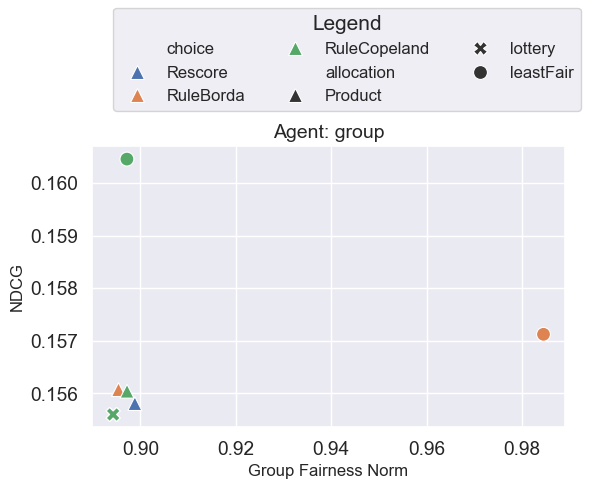

In [43]:
make_group_scatterplot(group, 0.11)

In [147]:
group_music = group[(group['choice'] == 'weightedscoring') & (group['allocation'] == 'least')]

In [130]:
group_movie = group[(group['choice'] == 'RuleBorda') & (group['allocation'] == 'least')]

In [35]:
group_music = group
all_music = all
ind_music = ind

In [122]:
group[['rbo', 'nlip']]

,rbo,nlip
4,0.870910,0.141628
7,0.869219,0.139471
8,0.801702,0.238647
12,0.801702,0.238647
14,0.823392,0.237504
17,0.871731,0.141876
18,0.870500,0.142779
19,0.870500,0.142779
21,0.869452,0.140887


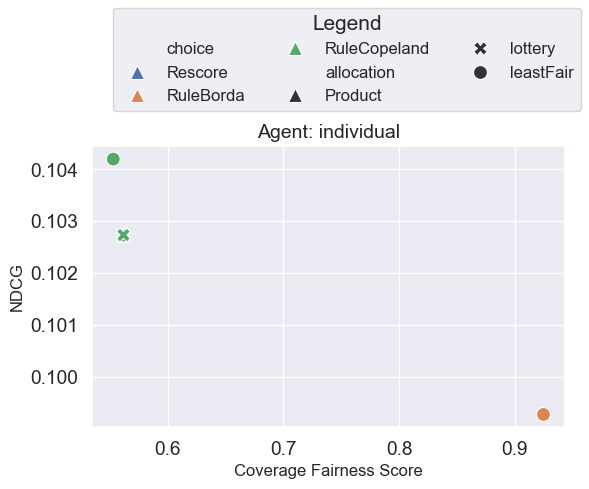

In [28]:
make_gini_scatterplot(ind, 0.10)

In [132]:
ind_movie = ind[(ind['choice'] == 'RuleCopeland') & (ind['allocation'] == 'product')]

In [150]:
ind_music = ind[(ind['choice'] == 'RuleCopeland') & (ind['allocation'] == 'product')]

In [126]:
ind[['rbo', 'nlip']]

,rbo,nlip
1,0.939358,0.059502
3,0.937855,0.060744
6,0.157260,0.841665
9,0.937855,0.060744
10,0.939358,0.059502
13,0.937761,0.060600
22,0.134476,0.849201
23,0.135876,0.847069
25,0.937761,0.060600


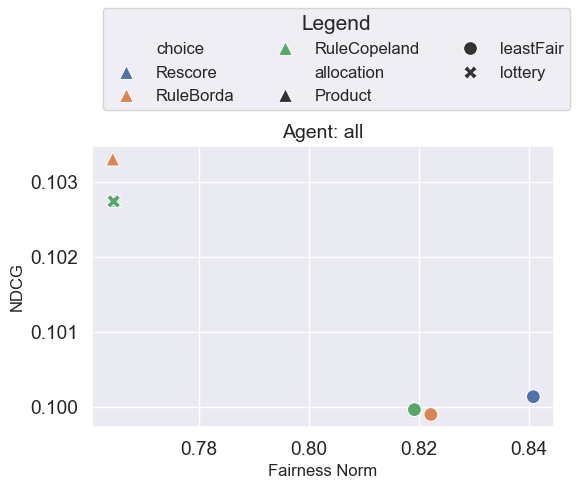

In [31]:
make_all_scatterplot(all)

In [32]:
all

,Unnamed: 0,agents,choice,allocation,data,weight,one,two,three,four,mean_ndcg,coverage,proportional_fairness_women,mean_rbo,nlip,gini,fairness_norm
0,0,all,Rescore,Product,ambar,0.600,NaN,NaN,NaN,NaN,0.102749,0.561629,0.608631,0.980487,0.016330,0.655626,0.764784
1,1,all,Rescore,leastFair,ambar,3.000,NaN,NaN,NaN,NaN,0.100137,0.545539,0.889154,0.882612,0.148241,0.639051,0.840778
2,2,all,Rescore,lottery,ambar,0.600,NaN,NaN,NaN,NaN,0.102736,0.561672,0.607965,0.980606,0.016260,0.655629,0.764584
3,3,all,RuleBorda,Product,ambar,0.900,2,NaN,NaN,NaN,0.103298,0.558954,0.610299,0.979413,0.011216,0.654533,0.764424
4,4,all,RuleBorda,leastFair,ambar,0.900,2,NaN,NaN,NaN,0.099900,0.545189,0.820797,0.890358,0.061487,0.641615,0.822174
5,5,all,RuleBorda,lottery,ambar,0.001,2,NaN,NaN,NaN,0.102736,0.561672,0.607965,0.980606,0.016260,0.655629,0.764584
6,6,all,RuleCopeland,Product,ambar,0.900,2,NaN,NaN,NaN,0.102749,0.561629,0.608631,0.980487,0.016330,0.655626,0.764784
7,7,all,RuleCopeland,leastFair,ambar,1.000,2,NaN,NaN,NaN,0.099965,0.545627,0.809460,0.894378,0.054989,0.642085,0.819183
8,8,all,RuleCopeland,lottery,ambar,0.001,2,NaN,NaN,NaN,0.102736,0.561672,0.607965,0.980606,0.016260,0.655629,0.764584


In [133]:
all_movie = all[(all['choice'] == 'weightedscoring') & (all['allocation'] == 'weighted')]
all_movie

,data,agents,choice,allocation,mean_ndcg,coverage,proportional_fairness_women,proportional_fairness_non-en,rbo,nlip,gini,fairness_norm
0,5movie,all,weightedscoring,weighted,0.091381,1.135873,0.909241,0.738655,0.286286,0.637148,0.985842,0.935296


In [176]:
all

,data,agents,choice,allocation,mean_ndcg,coverage,proportional_fairness,rbo,nlip,gini,fairness_norm
2,4ambar,all,RuleCopeland,least,0.087177,0.781484,0.798266,0.555807,0.434566,0.840642,0.888737
4,4ambar,all,weightedscoring,least,0.087177,0.781484,0.798266,0.555813,0.434566,0.840642,0.888737
5,4ambar,all,RuleBorda,weighted,0.092480,0.826463,0.701853,0.602631,0.352022,0.871245,0.873433
12,4ambar,all,weightedscoring,product,0.091251,0.834398,0.718049,0.587673,0.384532,0.869507,0.880416
16,4ambar,all,RuleBorda,least,0.089521,0.774601,0.792407,0.582338,0.426050,0.835436,0.885143
18,4ambar,all,weightedscoring,weighted,0.091610,0.817038,0.676749,0.611862,0.358136,0.872199,0.863275
19,4ambar,all,RuleBorda,product,0.091439,0.836985,0.715238,0.592228,0.383219,0.870592,0.880293
21,4ambar,all,RuleCopeland,product,0.091216,0.834749,0.718001,0.587646,0.384549,0.869485,0.880498
24,4ambar,all,RuleCopeland,weighted,0.091575,0.830803,0.695994,0.602643,0.363992,0.874381,0.872873


In [152]:
all_music = all[(all['choice'] == 'RuleBorda') & (all['allocation'] == 'weighted')]
all_music

,data,agents,choice,allocation,mean_ndcg,coverage,proportional_fairness,rbo,nlip,gini,fairness_norm
5,4ambar,all,RuleBorda,weighted,0.09248,0.826463,0.701853,0.602631,0.352022,0.871245,0.873433


In [129]:
all[['rbo', 'nlip']]

,rbo,nlip
0,0.286286,0.637148
2,0.273419,0.683264
5,0.294844,0.664028
11,0.270672,0.663622
15,0.292378,0.622387
16,0.307129,0.620222
20,0.261581,0.699718
24,0.249185,0.709353
26,0.279567,0.644100


ValueError: Could not interpret value `proportional_fairness` for parameter `x`

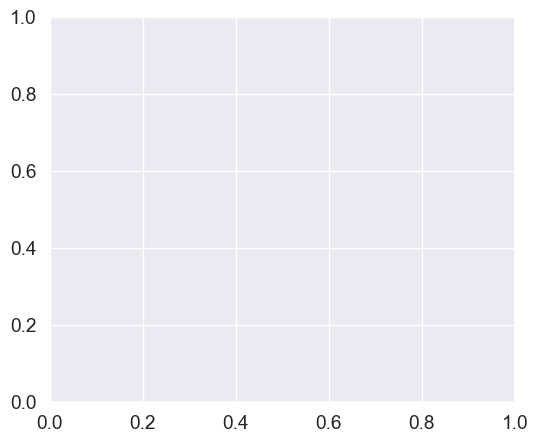

In [101]:
make_comp_scatterplot(all)

In [162]:
dfs = [ind_music, group_music, all_music, ind_movie, group_movie, all_movie]

combined_df = pd.concat(dfs, ignore_index=True)

# Display combined dataframe
print(combined_df)

     data      agents           choice allocation  mean_ndcg  coverage  \
0  4ambar  individual     RuleCopeland    product   0.092948  0.821729   
1  4ambar       group  weightedscoring      least   0.100182  0.548345   
2  4ambar         all        RuleBorda   weighted   0.092480  0.826463   
3  3movie  individual     RuleCopeland    product   0.157177  0.891434   
4  2movie       group        RuleBorda      least   0.154003  0.728660   
5  5movie         all  weightedscoring   weighted   0.091381  1.135873   

   proportional_fairness       rbo      nlip      gini  fairness_norm  \
0               0.555137  0.664229  0.310624  0.869962            NaN   
1               0.784547  0.916218  0.090872  0.643197       0.784547   
2               0.701853  0.602631  0.352022  0.871245       0.873433   
3                    NaN  0.937761  0.060600  0.567319            NaN   
4                    NaN  0.823392  0.237504  0.536470       1.002475   
5                    NaN  0.286286  0.63714

In [164]:
combined_df1 = combined_df[['data', 'agents', 'choice', 'allocation', 'mean_ndcg', 'coverage', 'proportional_fairness', 'proportional_fairness_non-en', 'proportional_fairness_women', 'rbo', 'nlip']]

In [165]:
combined_df1

,data,agents,choice,allocation,mean_ndcg,coverage,proportional_fairness,proportional_fairness_non-en,proportional_fairness_women,rbo,nlip
0,4ambar,individual,RuleCopeland,product,0.092948,0.821729,0.555137,NaN,NaN,0.664229,0.310624
1,4ambar,group,weightedscoring,least,0.100182,0.548345,0.784547,NaN,NaN,0.916218,0.090872
2,4ambar,all,RuleBorda,weighted,0.092480,0.826463,0.701853,NaN,NaN,0.602631,0.352022
3,3movie,individual,RuleCopeland,product,0.157177,0.891434,NaN,0.438177,0.701667,0.937761,0.060600
4,2movie,group,RuleBorda,least,0.154003,0.728660,NaN,1.005773,1.004140,0.823392,0.237504
5,5movie,all,weightedscoring,weighted,0.091381,1.135873,NaN,0.738655,0.909241,0.286286,0.637148


In [56]:
df = pd.read_parquet('data/extras/baseline.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [33]:
movies = pd.read_csv('tuned_movies.csv')
movies_sub = movies[['coverage', 'proportional_fairness_women', 'proportional_fairness_non-en']]
movies_sub
cor_movies = movies_sub.corr()

In [34]:
cor_movies

,coverage,proportional_fairness_women,proportional_fairness_non-en
coverage,1.000000,-0.542381,-0.528539
proportional_fairness_women,-0.542381,1.000000,0.728996
proportional_fairness_non-en,-0.528539,0.728996,1.000000


In [171]:
print(cor_movies.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  coverage &  proportional\_fairness\_women &  proportional\_fairness\_non-en \\
\midrule
coverage                     &  1.000000 &                    -0.777791 &                      0.128329 \\
proportional\_fairness\_women  & -0.777791 &                     1.000000 &                      0.234746 \\
proportional\_fairness\_non-en &  0.128329 &                     0.234746 &                      1.000000 \\
\bottomrule
\end{tabular}



/var/folders/1t/44v3s5n97h1drxtq1zb_gdlm0000gq/T/ipykernel_42283/3145460410.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cor_movies.to_latex())


In [177]:
music = pd.read_csv('movie_final.csv')

In [179]:
all

,data,agents,choice,allocation,mean_ndcg,coverage,proportional_fairness,rbo,nlip,gini,fairness_norm
2,4ambar,all,RuleCopeland,least,0.087177,0.781484,0.798266,0.555807,0.434566,0.840642,0.888737
4,4ambar,all,weightedscoring,least,0.087177,0.781484,0.798266,0.555813,0.434566,0.840642,0.888737
5,4ambar,all,RuleBorda,weighted,0.092480,0.826463,0.701853,0.602631,0.352022,0.871245,0.873433
12,4ambar,all,weightedscoring,product,0.091251,0.834398,0.718049,0.587673,0.384532,0.869507,0.880416
16,4ambar,all,RuleBorda,least,0.089521,0.774601,0.792407,0.582338,0.426050,0.835436,0.885143
18,4ambar,all,weightedscoring,weighted,0.091610,0.817038,0.676749,0.611862,0.358136,0.872199,0.863275
19,4ambar,all,RuleBorda,product,0.091439,0.836985,0.715238,0.592228,0.383219,0.870592,0.880293
21,4ambar,all,RuleCopeland,product,0.091216,0.834749,0.718001,0.587646,0.384549,0.869485,0.880498
24,4ambar,all,RuleCopeland,weighted,0.091575,0.830803,0.695994,0.602643,0.363992,0.874381,0.872873


In [174]:
music = music[['coverage', 'proportional_fairness']]

In [175]:
music.corr()

,coverage,proportional_fairness
coverage,1.000000,-0.798092
proportional_fairness,-0.798092,1.000000
